<center>
<table ><tr><td valign='center' bgcolor='white'>
  <a href="https://web.facebook.com/DAT.KUSRC/" target="_blank"><img src="https://drive.google.com/uc?id=1dNBiKikzW1-osi6lleLOgSOKQ65IIfMC" height="50px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://www.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1ZfGOBmxAwg8SAhyseFziyinzxBGme78a" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://mike.cpe.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1s6r3iG_Slpu_NSWqdt5zBp8Z9hV0-zh6" height="50px"></a>
</td></tr></table>
</center>

<center><h1><b>Machine Learning: Regression</b></h1></center>

---

### **Regression using sklearn <sup>[<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">1</a>]</sup>**


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive') #เครื่องเรามองเห็นได้

Mounted at /content/drive


In [3]:
# Now, define your path of the input files
data_path = '/content/drive/My Drive/ML/' 

In [4]:
# Read Cities.csv into dataframe
f = data_path + 'Cities.csv'
cities = pd.read_csv(f)
cities

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02
209,Zaragoza,Spain,41.65,-0.89,14.17
210,Zhytomyr,Ukraine,50.25,28.66,6.67
211,Zonguldak,Turkey,41.43,31.78,10.64


In [ ]:
cities.city

0          Aalborg
1         Aberdeen
2           Abisko
3            Adana
4         Albacete
          ...     
208    Yevpatoriya
209       Zaragoza
210       Zhytomyr
211      Zonguldak
212         Zurich
Name: city, Length: 213, dtype: object

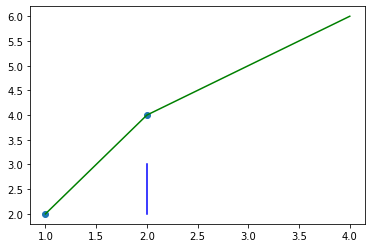

In [5]:
# Introduction to plotting a line
plt.plot([1,2,4], [2,4,6], color='green')
plt.plot([2,2],[3,2],color='blue')
plt.scatter([1,2],[2,4])

plt.show()

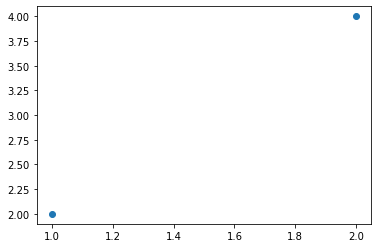

In [6]:
plt.scatter([1,2],[2,4])
plt.show()

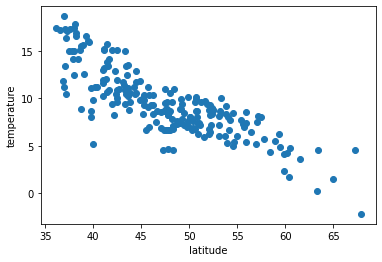

In [7]:
# Create latitude versus temperature scatterplot
lats = cities.latitude
temps = cities.temperature

plt.xlabel('latitude')
plt.ylabel('temperature')
plt.scatter(lats, temps)
plt.show()

<center>
<img src="https://drive.google.com/uc?id=1CTrbAuQQS3yQOlyGpka5bHnLpW7T-Tfm" height="400px"><br>
Source: https://www.aiproblog.com/index.php/forums/topic/multiple-linear-regression-with-python-numpy-matplotlib-plot-in-3d/
</center>

In [8]:
# Train a linear regression model
# y = (a_0 * X_0) + (a_1 * X_1) + ... + (a_n * X_n) + b  #a ค่าความเอียง  
features = ['latitude']
X = cities[features]      # Expected 2D array of predictor values
y = cities['temperature'] # 1D or 2D array depending on the problem

model = LinearRegression()
model.fit(X, y)

print('Coefficients: ', model.coef_[0]) #ความชัน
print('Intercept: ', model.intercept_)
# y = ax + b (a = coefficients and b = intercept)

Coefficients:  -0.43601903998914965
Intercept:  30.208703834316534


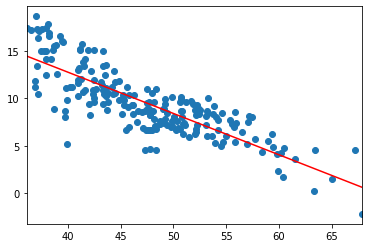

In [9]:
# The above scatterplot
plt.scatter(lats,temps)

# Add a linear line
a = model.coef_[0]
b = model.intercept_
x1 = min(lats)
x2 = max(lats)
plt.plot([x1, x2], [a*x1+b, a*x2+b], color='red')
plt.xlim(x1,x2) #modify ghaph reduce space
plt.show()

# Beautify using plt.xlim(x1,x2)

In [10]:
# Use the linear regression model
lat1 = 10
lat2 = 20
# pred_temp = model.predict([[lat1],[lat2]])
pred_temp = model.predict(pd.DataFrame({'latitude':[lat1,lat2]}))  #ใช้เเล้วไม่ขึ้น userwarning
pred_temp

array([25.84851343, 21.48832303])

In [11]:
features = ['latitude']  #ค่าจริง-ค่าบนเส้นหรือค่าใต้เส้น
X = cities[features]
pred_temp = model.predict(X)
# The mean squared error
print("Mean squared error (MSE):", mean_squared_error(temps, pred_temp)) #temps ค่าจริง 
# Explained variance score: 1 is perfect prediction
print("Variance score (R^2):", r2_score(temps, pred_temp))

Mean squared error (MSE): 4.050053761117255
Variance score (R^2): 0.6791484445278801


In [12]:
# Correlation coefficients (r values)
cor = cities.corr()
cor

,latitude,longitude,temperature
latitude,1.000000,-0.105196,-0.824105
longitude,-0.105196,1.000000,-0.169308
temperature,-0.824105,-0.169308,1.000000


In [13]:
selected_cities = cities[cities.country.isin(['Norway', 'France', 'Turkey'])]
print(selected_cities)

            city country  latitude  longitude  temperature
3          Adana  Turkey     36.99      35.32        18.67
6         Amiens  France     49.90       2.30        10.17
10        Angers  France     47.48      -0.53        10.98
11        Ankara  Turkey     39.93      32.86         9.86
12       Antalya  Turkey     36.89      30.70        11.88
23        Batman  Turkey     37.89      41.14        14.16
27        Bergen  Norway     60.39       5.32         1.75
35          Bodo  Norway     67.25      14.40         4.50
38      Bordeaux  France     44.85      -0.60        11.87
46         Brest  France     48.39      -4.50        11.02
54         Bursa  Turkey     40.20      29.07        11.16
57          Caen  France     49.18      -0.35         9.96
72       Denizli  Turkey     37.77      29.08        15.02
73         Dijon  France     47.33       5.03         8.69
77        Edirne  Turkey     41.67      26.57        10.90
81      Erzincan  Turkey     39.75      39.49         8.

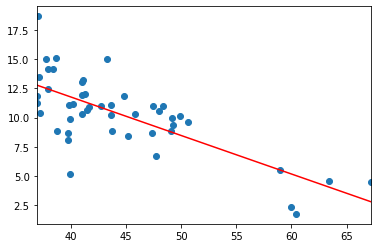

Enter city name (or "quit" to quit): quit


In [14]:
# Use linear regression for temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
selected_cities = cities[cities.country.isin(['Norway', 'France', 'Turkey'])]
features = ['latitude']
X = selected_cities[features]
y = selected_cities['temperature']

# Compute and show regression
plt.scatter(X,y)

model = LinearRegression()
model.fit(X,y)
a = model.coef_[0]
b = model.intercept_
lats = selected_cities.latitude
x1 = min(lats)
x2 = max(lats)
plt.plot([x1, x2], [a*x1+b, a*x2+b], color='red')

plt.xlim(x1,x2)
plt.show()

# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': 
        break
    else:
        if not name in list(cities.city):
            print(name, 'not in dataset')
        else:
            lat = cities[cities.city == name].latitude.iloc[0]
            temp = cities[cities.city == name].temperature.iloc[0]
            # pred_temp = model.predict([[lat]])[0] # equal to (a*lat + b)
            pred_temp = model.predict(pd.DataFrame({'latitude':[lat]}))[0]
            print('Predicted temperature:', pred_temp)
            print('Actual temperature:', temp)

### <font color="green">**Your Turn: World Cup Data**</font> (20 Minutes)

In [15]:
# Read Players.csv into another dataframe
f = data_path + 'Players.csv'
players = pd.read_csv(f)
players

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [16]:
# From the players data, compute and plot a linear regression for
# minutes played versus passes made.
# Reminder: copy-paste-modify approach to programming!
mint = players.minutes
passe = players.passes

# plt.xlabel('minutes')
# plt.ylabel('passes')

features = ['minutes']
x1 = players[features]      # Expected 2D array of predictor values
y1 = players['passes'] # 1D or 2D array depending on the problem

model = LinearRegression()
model.fit(x1, y1)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)




Coefficients:  [0.4333056]
Intercept:  -5.980874925474637


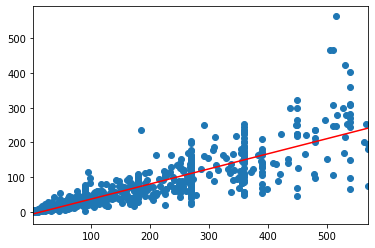

Mean squared error (MSE): 2002.3578003835567
Variance score (R^2): 0.6644194989829033


In [17]:
# The above scatterplot
plt.scatter(mint,passe)

# Add a linear line
a = model.coef_[0]
b = model.intercept_
x11 = min(mint)
x22 = max(mint)
plt.plot([x11, x22], [a*x11+b, a*x22+b], color='red')
plt.xlim(x11,x22) 
plt.show()


features = ['minutes']  #ค่าจริง-ค่าบนเส้นหรือค่าใต้เส้น
X = players[features]
pred_temp = model.predict(X)
# The mean squared error
print("Mean squared error (MSE):", mean_squared_error(passe, pred_temp)) #temps ค่าจริง 
# Explained variance score: 1 is perfect prediction
print("Variance score (R^2):", r2_score(passe, pred_temp))


Output:

<img src="https://mike.cpe.ku.ac.th/un/DAT/regression_Output-01.jpg" width="400px">

In [18]:
# Show the correlation coefficient for the regression.
# Extra credit: Also show correlation coefficients for minutes played
# versus tackles, minutes played versus shots, and minutes played versus saves
# Correlation coefficients (r values)
cor = players.corr()
cor

,minutes,shots,passes,tackles,saves
minutes,1.000000,0.407923,0.815119,0.610673,0.228477
shots,0.407923,1.000000,0.343163,0.176283,-0.154958
passes,0.815119,0.343163,1.000000,0.702097,-0.062057
tackles,0.610673,0.176283,0.702097,1.000000,-0.201190
saves,0.228477,-0.154958,-0.062057,-0.201190,1.000000


Output:

<img src="https://mike.cpe.ku.ac.th/un/DAT/regression_Output-02.jpg" width="470px">

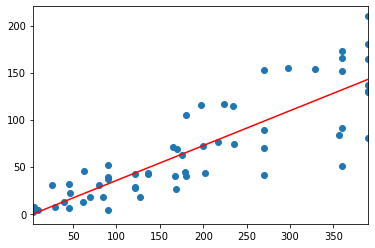

Mean squared error (MSE): 2162.3944461318897
Variance score (R^2): 0.6375985293484883


In [25]:
# Use linear regression for number-of-passes predictor.
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
selected_p = players[players.team.isin(['Greece', 'USA', 'Portugal'])]

features = ['minutes']
X = selected_p[features]
y = selected_p['passes']

# Compute and show regression
plt.scatter(X,y)

model = LinearRegression()
model.fit(X,y)
a = model.coef_[0]
b = model.intercept_
mint = selected_p.minutes
x1 = min(mint)
x2 = max(mint)
plt.plot([x1, x2], [a*x1+b, a*x2+b], color='red')

plt.xlim(x1,x2)
plt.show()

features = ['minutes']  #ค่าจริง-ค่าบนเส้นหรือค่าใต้เส้น
X = players[features]
pred_temp = model.predict(X)


print("Mean squared error (MSE):", mean_squared_error(passe, pred_temp)) #temps ค่าจริง 
# Explained variance score: 1 is perfect prediction
print("Variance score (R^2):", r2_score(passe, pred_temp))

Output:

<img src="https://mike.cpe.ku.ac.th/un/DAT/regression_Output-03.jpg" width="400px">

In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.


## **Acknowledgement**

Most parts of this tutorial were originated from Prof. Jennifer Widom, Stanford University. Many thanks to her for providing a short-course and workshop in data science at Kasetsart University (Main Campus) in October 2016.

## **References**

[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html